In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
## 데이터 둘러보기
data_path = './data_categorical/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')

### 데이터 합치기
all_data_temp = pd.concat([train, test], ignore_index=True)
print(all_data_temp)

            id  bin_0  bin_1  bin_2 bin_3 bin_4  nom_0      nom_1    nom_2  \
0            0      0      0      0     T     Y  Green   Triangle    Snake   
1            1      0      1      0     T     Y  Green  Trapezoid  Hamster   
2            2      0      0      0     F     Y   Blue  Trapezoid     Lion   
3            3      0      1      0     F     Y    Red  Trapezoid    Snake   
4            4      0      0      0     F     N    Red  Trapezoid     Lion   
...        ...    ...    ...    ...   ...   ...    ...        ...      ...   
499995  499995      0      0      0     F     N  Green     Square     Lion   
499996  499996      1      0      0     F     Y  Green  Trapezoid     Lion   
499997  499997      0      1      1     T     Y  Green  Trapezoid     Lion   
499998  499998      1      0      0     T     Y   Blue       Star  Hamster   
499999  499999      0      0      0     T     Y  Green       Star     Lion   

             nom_3  ...      nom_9 ord_0        ord_1        or

In [6]:
### 필요 없는 피처 제거
drop_features = ['target']

all_data = all_data_temp.drop(drop_features, axis=1)

all_data

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,499995,0,0,0,F,N,Green,Square,Lion,Canada,...,9e4b23160,acc31291f,1,Novice,Lava Hot,j,A,Gb,1,3
499996,499996,1,0,0,F,Y,Green,Trapezoid,Lion,China,...,cfbd87ed0,eae3446d0,1,Contributor,Lava Hot,f,S,Ed,2,2
499997,499997,0,1,1,T,Y,Green,Trapezoid,Lion,Canada,...,1108bcd6c,33dd3cf4b,1,Novice,Boiling Hot,g,V,TR,3,1
499998,499998,1,0,0,T,Y,Blue,Star,Hamster,Costa Rica,...,606ac930b,d4cf587dd,2,Grandmaster,Boiling Hot,g,X,Ye,2,1


In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      500000 non-null  int64 
 1   bin_0   500000 non-null  int64 
 2   bin_1   500000 non-null  int64 
 3   bin_2   500000 non-null  int64 
 4   bin_3   500000 non-null  object
 5   bin_4   500000 non-null  object
 6   nom_0   500000 non-null  object
 7   nom_1   500000 non-null  object
 8   nom_2   500000 non-null  object
 9   nom_3   500000 non-null  object
 10  nom_4   500000 non-null  object
 11  nom_5   500000 non-null  object
 12  nom_6   500000 non-null  object
 13  nom_7   500000 non-null  object
 14  nom_8   500000 non-null  object
 15  nom_9   500000 non-null  object
 16  ord_0   500000 non-null  int64 
 17  ord_1   500000 non-null  object
 18  ord_2   500000 non-null  object
 19  ord_3   500000 non-null  object
 20  ord_4   500000 non-null  object
 21  ord_5   500000 non-null  object
 

In [8]:
### bin_0 ~ bin_4 의 고유값 출력
for i in range(5):
    feature = 'bin_' + str(i)
    print(f'{feature} unique: {all_data[feature].unique()}')

bin_0 unique: [0 1]
bin_1 unique: [0 1]
bin_2 unique: [0 1]
bin_3 unique: ['T' 'F']
bin_4 unique: ['Y' 'N']


In [9]:
# 이진 피처 인코딩
# bin_0, bin_1, bin_2 피처는 0과 1
# bin_3은 T와 F, bin_4는 Y와 N
all_data['bin_3'] = all_data['bin_3'].map({'F':0, 'T':1})
all_data['bin_4'] = all_data['bin_4'].map({'N':0, 'Y':1})

In [10]:
### ord_0 ~ ord_5 의 고유값 출력
for i in range(6):
    feature = 'ord_' + str(i)
    print(f'{feature} unique: {all_data[feature].unique()}')

ord_0 unique: [2 1 3]
ord_1 unique: ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 unique: ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']
ord_3 unique: ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 unique: ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 unique: ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 

In [11]:
# -------------------------------------------
# 순서형 피처 인코딩
# ord_0 피처는 이미 숫자
# ord_1과 ord_2 인코딩
ord1dict = {'Novice':0, 'Contributor':1, 'Expert':2, 'Master':3, 'Grandmaster':4}
ord2dict = {'Freezing':0, 'Cold':1, 'Warm':2, 'Hot':3, 'Boiling Hot':4, 'Lava Hot':5}

all_data['ord_1'] = all_data['ord_1'].map(ord1dict)
all_data['ord_2'] = all_data['ord_2'].map(ord2dict)

In [12]:
from sklearn.preprocessing import OrdinalEncoder

ord_345 = ['ord_3','ord_4','ord_5']

ord_encoder = OrdinalEncoder()

all_data[ord_345] = ord_encoder.fit_transform(all_data[ord_345])

In [14]:
# -------------------------------------------
# 명목형 피처 인코딩
# 순서를 무시해도 무관하므로 원-핫 인코딩

nom_features = ['nom_'+str(i) for i in range(10)]

from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()

encoded_nom_matrix = onehot_encoder.fit_transform(all_data[nom_features])

all_data = all_data.drop(nom_features, axis=1)

In [16]:
# -------------------------------------------
# 날짜 피처 인코딩
date_features = ['day','month']

encoded_date_matrix = onehot_encoder.fit_transform(all_data[date_features])

all_data = all_data.drop(date_features, axis=1)

In [17]:
all_data.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5
0,0,0,0,0,1,1,2,4,1,7.0,3.0,136.0
1,1,0,1,0,1,1,1,4,3,0.0,0.0,93.0
2,2,0,0,0,0,1,1,2,5,7.0,17.0,31.0
3,3,0,1,0,0,1,1,4,4,8.0,3.0,134.0
4,4,0,0,0,0,0,1,4,0,0.0,17.0,158.0


In [3]:
train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

train.head()

#train.shape, test.shape

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [4]:
pd.options.display.max_columns=24

train.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [5]:
train.head().T

#train.head().transpose()

id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada
nom_4,Bassoon,Piano,Theremin,Oboe,Oboe


In [6]:
test.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,,,
300000,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,Piano,0870b0a5d,9ceb19dd6,530f8ecc3,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
300001,0,0,0,T,N,Red,Square,Lion,Canada,Piano,a5c276589,1ad744242,12e6161c9,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
300002,1,0,1,F,Y,Blue,Square,Dog,China,Piano,568550f04,1fe17a1fd,27d6df03f,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12
300003,0,0,1,T,Y,Red,Star,Cat,China,Piano,c5725677e,a6542cec0,30c63bd0c,0b6ec68ff,b5de3dcc4,1,Contributor,Lava Hot,b,Q,ke,2,3
300004,0,1,1,F,N,Red,Trapezoid,Dog,China,Piano,e70a6270d,97b6a3518,a42386065,f91f3b1ee,967cfa9c9,3,Grandmaster,Lava Hot,l,W,qK,4,11


In [7]:
submission.head()

,target
id,
300000,0.5
300001,0.5
300002,0.5
300003,0.5
300004,0.5


In [8]:
### 피처 요약표 Feature Summarized Table
def resumetable(df):
    print(f'Shape of dataset: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': 'Feature'})
    
    summary['Missing'] = df.isnull().sum().values
    summary['Unique'] = df.nunique().values
    summary['First value'] = df.loc[0].values
    summary['Second value'] = df.loc[1].values
    summary['Third value'] = df.loc[2].values
    
    return summary

resumetable(train)

Shape of dataset: (300000, 24)


,Feature,Data Type,Missing,Unique,First value,Second value,Third value
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


In [9]:
### 피처 요약표 해석
### bin_0 ~ bin_4
### nom_0 ~ nom_9
### ord_0 ~ ord_5
### day, month, target

In [10]:
### ord_0 ~ ord_2 의 고유값 출력
for i in range(3):
    feature = 'ord_' + str(i)
    print(f'{feature} unique: {train[feature].unique()}')

ord_0 unique: [2 1 3]
ord_1 unique: ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 unique: ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [11]:
### ord_3 ~ ord_5 의 고유값 출력
for i in range(3,6):
    feature = 'ord_' + str(i)
    print(f'{feature} unique: {train[feature].unique()}')

ord_3 unique: ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 unique: ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 unique: ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 'zU' 'bJ'
 'Kf' 'c

In [12]:
### day, month, target 의 고유값 출력
print('day 고유값:', train['day'].unique())
print('month 고유값:', train['month'].unique())
print('target 고유값:', train['target'].unique())

day 고유값: [2 7 5 4 3 1 6]
month 고유값: [ 2  8  1  4 10  3  7  9 12 11  5  6]
target 고유값: [0 1]


In [13]:
## 데이터 시각화

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [14]:
def write_percent(ax, total_size):
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height/total_size*100
        
        ax.text(x=left_coord + width/2.0,
               y=height+total_size*0.001,
               s=f'{percent:1.1f}%',
               ha='center')

Text(0.5, 1.0, 'Target Distribution')

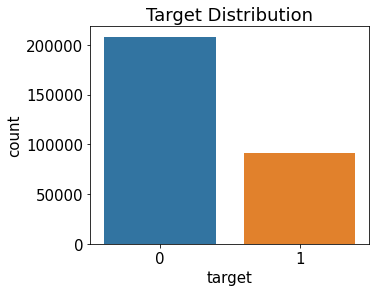

In [15]:
### 타깃값 분포
### 수치형 데이터의 분포를 파악할 땐 주로 displot()을 사용
### 범주형 데이터의 분포를 파악할 땐 주로 countplot()을 사용

mpl.rc('font', size=15)
plt.figure(figsize=(5,4))

ax = sns.countplot(x='target', data=train)

ax.set_title('Target Distribution')

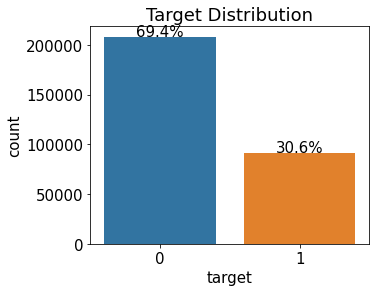

In [16]:
mpl.rc('font', size=15)
plt.figure(figsize=(5,4))

ax = sns.countplot(x='target', data=train)

ax.set_title('Target Distribution')

write_percent(ax,len(train))

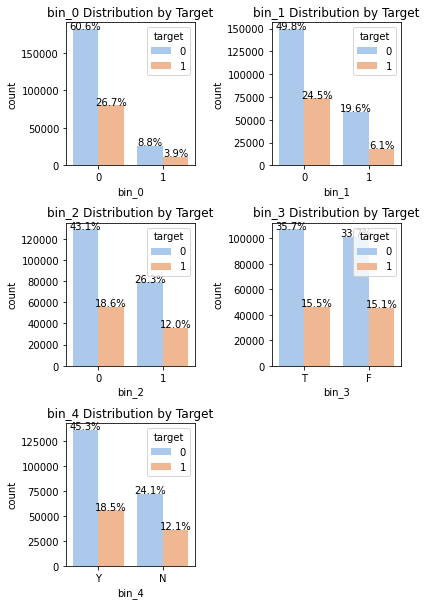

In [17]:
### 이진 피처 분포

import matplotlib.gridspec as gridspec

# Step 1
mpl.rc('font', size=10)
grid = gridspec.GridSpec(3,2)
plt.figure(figsize=(6,10))
plt.subplots_adjust(wspace=0.6, hspace=0.4)

# Step 2
bin_features = ['bin_0','bin_1','bin_2','bin_3','bin_4']

#ax0 = plt.subplot(grid[0])
#ax0 = sns.countplot()

#ax1 = plt.subplot(grid[1])
#ax1 = sns.countplot()

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])
    
    sns.countplot(x=feature,
                 data=train,
                 hue='target',
                 palette='pastel',
                 ax=ax)
    
# Step 3    
    ax.set_title(f'{feature} Distribution by Target')
    
    write_percent(ax, len(train))

In [18]:
### 명목형 피처 (nom_0 ~ nom_4)
# Step 1
# 교차 분석표 생성 함수
# pandas의 crosstab() 함수
# 명목형 피처별 타깃값 비율을 구하기 위함

pd.crosstab(train['nom_0'], train['target'])

target,0,1
nom_0,,
Blue,72914,23252
Green,85682,41659
Red,49640,26853


In [19]:
# 정규화 후 비율을 백분율로 표현
crosstab = pd.crosstab(train['nom_0'], train['target'], normalize='index')*100
crosstab

target,0,1
nom_0,,
Blue,75.820976,24.179024
Green,67.285478,32.714522
Red,64.894827,35.105173


In [20]:
crosstab = crosstab.reset_index()
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [21]:
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'], normalize='index')*100
    crosstab = crosstab.reset_index()
    return crosstab

In [22]:
crosstab = get_crosstab(train, 'nom_0')
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [23]:
crosstab[0], crosstab[1]

(0    75.820976
 1    67.285478
 2    64.894827
 Name: 0, dtype: float64,
 0    24.179024
 1    32.714522
 2    35.105173
 Name: 1, dtype: float64)

In [24]:
# Step 2
# 포인트플롯 생성 함수
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx()  
    # x축은 공유하지만 y축은 공유하지 않는 새로운 축 ax2 생성
    # ax는 카운트플롯을 그리기 위한 축
    # ax2는 포인트플롯을 그리기 위한 축
    ax2 = sns.pointplot(x=feature, y=1, data=crosstab, 
                        order=crosstab[feature].values, 
                        color='black', 
                        legend=False)
    
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1)
    
    ax2.set_ylabel('Target 1 Ratio(%)')

In [25]:
# Step 3
# 피처 분포도 및 피처별 타깃값의 비율 포인트플롯 생성
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, size=(15,20)):
    plt.figure(figsize=size)
    grid = gridspec.GridSpec(num_rows, num_cols)
    plt.subplots_adjust(wspace=0.45, hspace=0.3)
    
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature)
        
        sns.countplot(x=feature, data=df,
                     order=crosstab[feature].values,
                     color='skyblue',
                     ax=ax)
        
        write_percent(ax, len(df))
        
        plot_pointplot(ax, feature, crosstab)
        
        ax.set_title(f'{feature} Distribution')

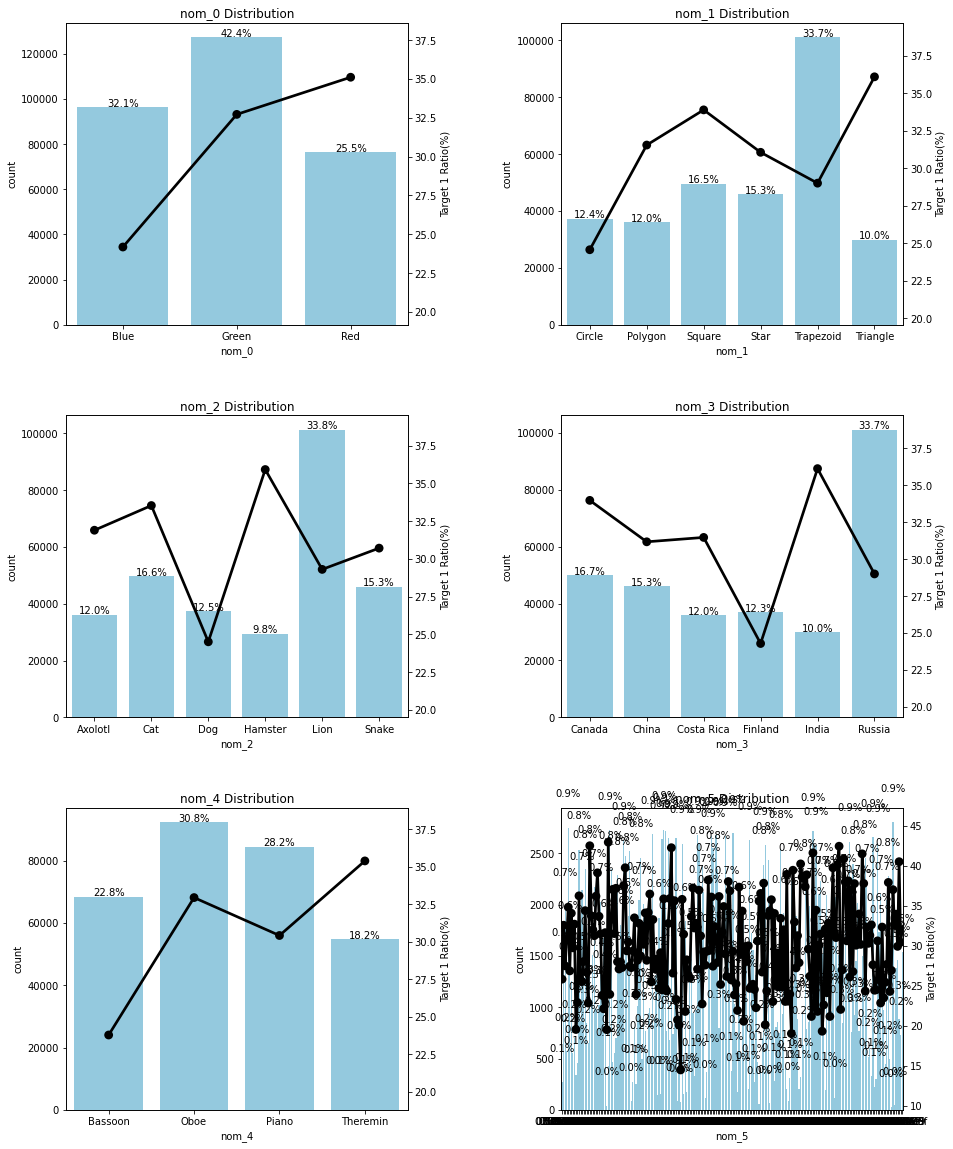

In [26]:
nom_features = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4','nom_5']
plot_cat_dist_with_true_ratio(train, nom_features, num_rows=3, num_cols=2)

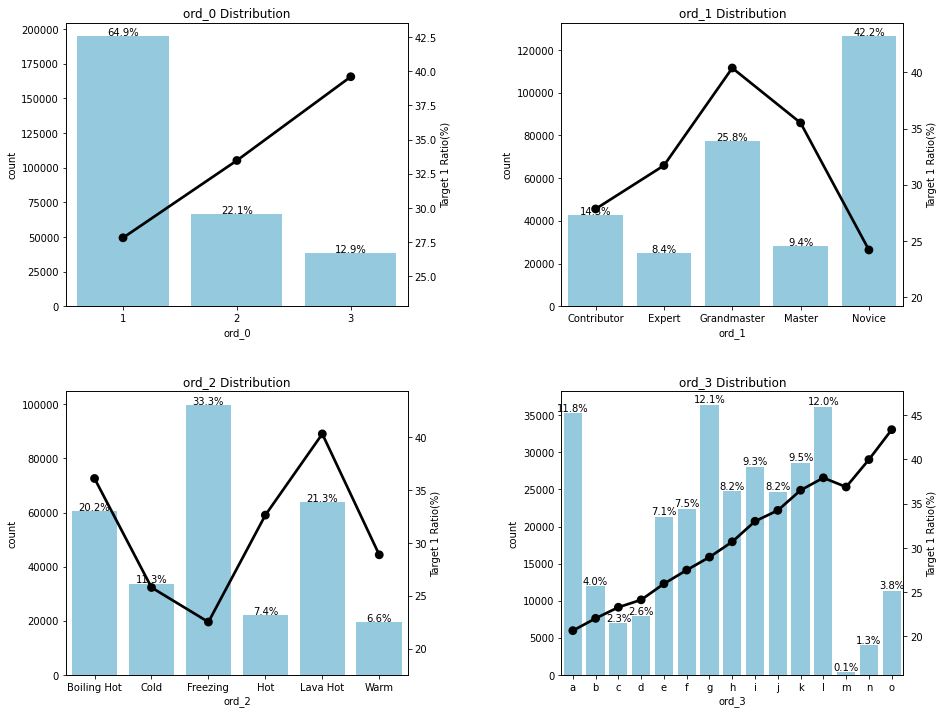

In [27]:
### 순서형 피처
ord_features = ['ord_0', 'ord_1', 'ord_2', 'ord_3']
plot_cat_dist_with_true_ratio(train, ord_features, num_rows=2, num_cols=2, size=(15,12))

In [28]:
# 순서형 피처에 순서지정
# CategoricalDtype()

from pandas.api.types import CategoricalDtype

ord_1_value = ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']

ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True)
ord_2_dtype = CategoricalDtype(categories=ord_2_value, ordered=True)

train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)

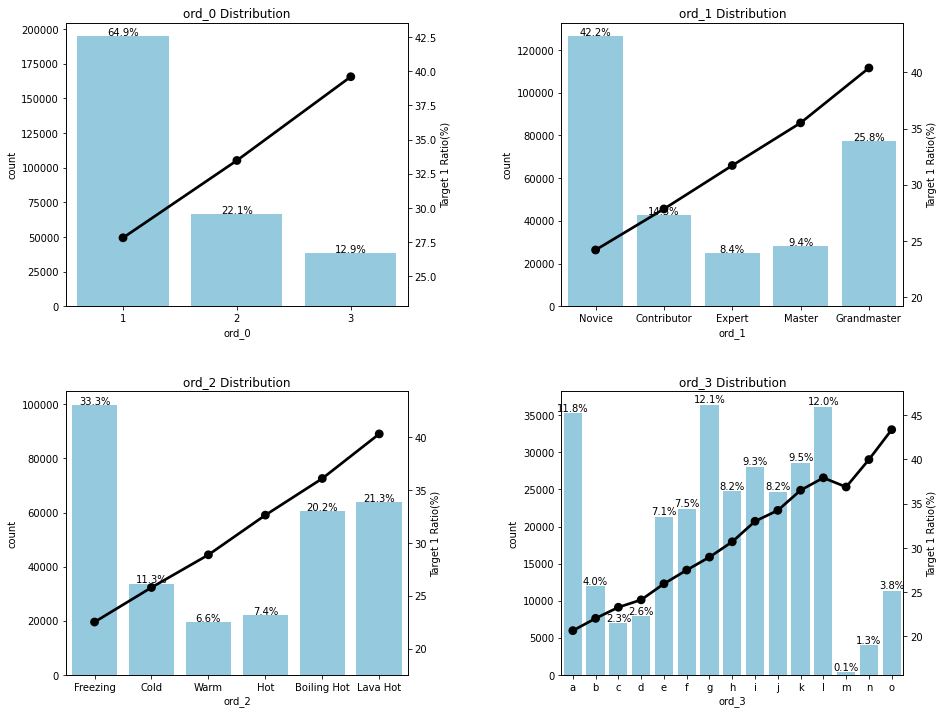

In [29]:
plot_cat_dist_with_true_ratio(train, ord_features, num_rows=2, num_cols=2, size=(15,12))

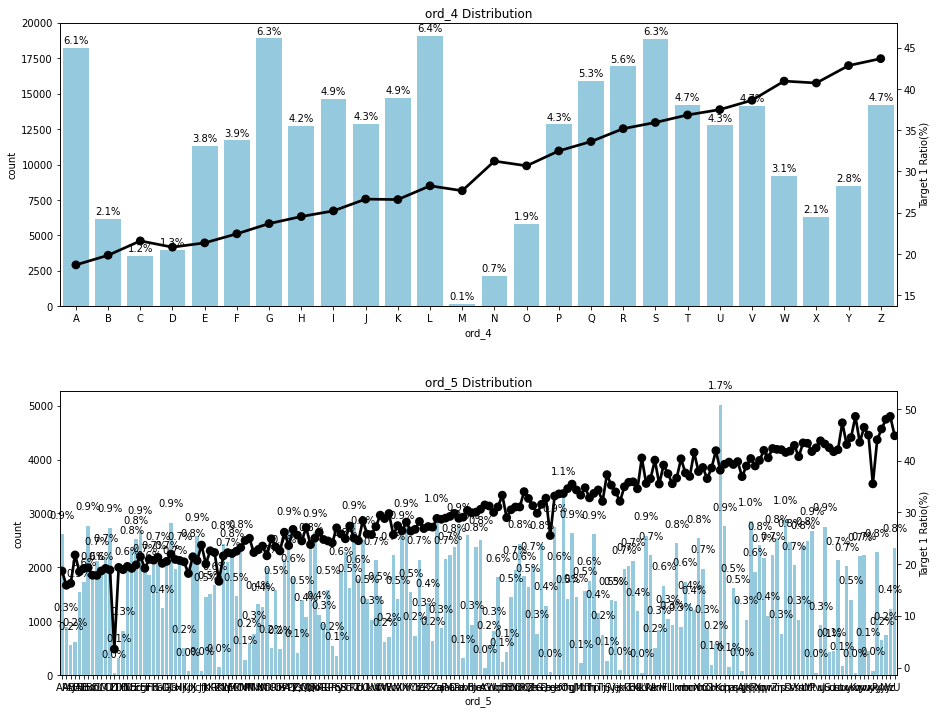

In [30]:
plot_cat_dist_with_true_ratio(train, ['ord_4','ord_5'], num_rows=2, num_cols=1, size=(15,12))

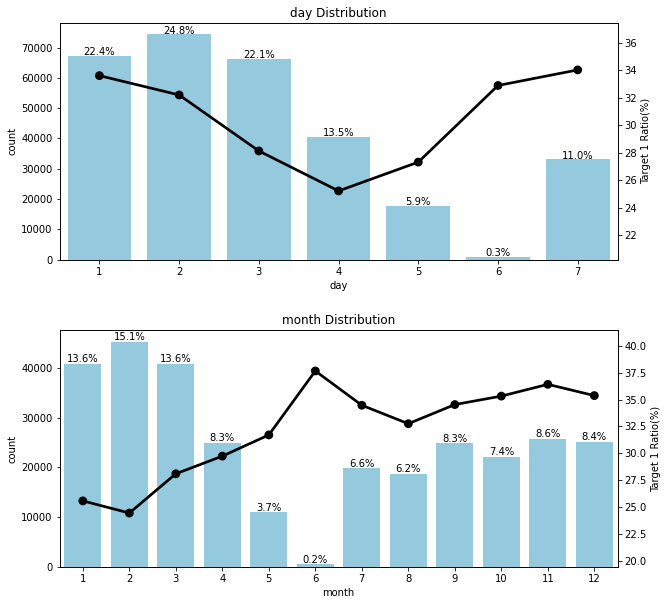

In [31]:
# 날짜 피처
date_features = ['day', 'month']
plot_cat_dist_with_true_ratio(train, date_features, num_rows=2, num_cols=1, size=(10,10))

### EDA 확인 후 프로젝트 시작

In [32]:
## 베이스라인 모델

### 데이터 불러오기
import pandas as pd

data_path = '/kaggle/input/cat-in-the-dat/'

train = pd.read_csv(data_path+'train.csv', index_col='id')
test = pd.read_csv(data_path+'test.csv', index_col='id')
submission = pd.read_csv(data_path+'sample_submission.csv', index_col='id')

In [33]:
### 피처 엔지니어링
# 데이터 합치기
all_data = pd.concat([train, test])

all_data

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0.0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0.0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0.0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1.0
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,0,F,N,Green,Square,Lion,Canada,Theremin,6c90f81cd,a406a5f12,d02a6b0ba,9e4b23160,acc31291f,1,Novice,Lava Hot,j,A,Gb,1,3,NaN
499996,1,0,0,F,Y,Green,Trapezoid,Lion,China,Piano,2d61990e2,520806ce2,d2d8eabdb,cfbd87ed0,eae3446d0,1,Contributor,Lava Hot,f,S,Ed,2,2,NaN
499997,0,1,1,T,Y,Green,Trapezoid,Lion,Canada,Oboe,488406659,28645754b,22831fffe,1108bcd6c,33dd3cf4b,1,Novice,Boiling Hot,g,V,TR,3,1,NaN


In [34]:
all_data = all_data.drop('target', axis=1)

all_data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8


In [35]:
all_data.shape

(500000, 23)

In [36]:
### 원-핫 인코딩
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
all_data_encoded = encoder.fit_transform(all_data)

all_data_encoded

<500000x16552 sparse matrix of type '<class 'numpy.float64'>'
	with 11500000 stored elements in Compressed Sparse Row format>

In [37]:
print(all_data_encoded)

  (0, 0)	1.0
  (0, 2)	1.0
  (0, 4)	1.0
  (0, 7)	1.0
  (0, 9)	1.0
  (0, 11)	1.0
  (0, 18)	1.0
  (0, 24)	1.0
  (0, 28)	1.0
  (0, 31)	1.0
  (0, 113)	1.0
  (0, 377)	1.0
  (0, 1270)	1.0
  (0, 3688)	1.0
  (0, 6410)	1.0
  (0, 16287)	1.0
  (0, 16291)	1.0
  (0, 16295)	1.0
  (0, 16307)	1.0
  (0, 16318)	1.0
  (0, 16477)	1.0
  (0, 16534)	1.0
  (0, 16541)	1.0
  (1, 0)	1.0
  (1, 3)	1.0
  :	:
  (499998, 16534)	1.0
  (499998, 16540)	1.0
  (499999, 0)	1.0
  (499999, 2)	1.0
  (499999, 4)	1.0
  (499999, 7)	1.0
  (499999, 9)	1.0
  (499999, 11)	1.0
  (499999, 16)	1.0
  (499999, 23)	1.0
  (499999, 29)	1.0
  (499999, 33)	1.0
  (499999, 186)	1.0
  (499999, 647)	1.0
  (499999, 1559)	1.0
  (499999, 2667)	1.0
  (499999, 6320)	1.0
  (499999, 16287)	1.0
  (499999, 16293)	1.0
  (499999, 16296)	1.0
  (499999, 16311)	1.0
  (499999, 16324)	1.0
  (499999, 16455)	1.0
  (499999, 16534)	1.0
  (499999, 16541)	1.0


In [38]:
### 데이터 나누기

num_train = len(train)

X_train = all_data_encoded[:num_train]
X_test = all_data_encoded[num_train:]

y = train['target']


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y,
                                                     test_size=0.1,
                                                     stratify=y,
                                                     random_state=10)

In [40]:
### 모델 훈련

from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000, random_state=42)

logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [41]:
### 모델 성능 검증
# predict(): 타깃값 자체 0 혹은 1을 예측
# predict_proba() : 타깃값의 확률을 예측

logistic_model.predict_proba(X_valid)

array([[0.23276687, 0.76723313],
       [0.91419091, 0.08580909],
       [0.83030309, 0.16969691],
       ...,
       [0.24826073, 0.75173927],
       [0.49433144, 0.50566856],
       [0.95658825, 0.04341175]])

In [42]:
logistic_model.predict(X_valid)

array([1, 0, 0, ..., 1, 1, 0])

In [43]:
y_valid_preds = logistic_model.predict_proba(X_valid)[:,1]

In [44]:
# ROC AUC 평가함수
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_valid, y_valid_preds)

print(f'검증 데이터 ROC AUC : {roc_auc: .4f}')

검증 데이터 ROC AUC :  0.7965


In [45]:
# 타깃값이 1일 확률 예측
#y_preds = logistic_model.predict_proba(X_test)[:,1]

In [46]:
### 제출

#submission['target'] = y_preds
#submission.to_csv('submission.csv')

In [47]:
## 성능 개선 1
# 1. 피처 맞춤 인코딩
# 이진 피처와 순서형 피처 ord_1, ord_2는 수작업으로 인코딩 
# 순서형 피처 ord_3, ord_4, ord_5는 ordinal 인코딩
# 명목형 피처와 날짜 피처는 원-핫 인코딩

# 2. 피처 스케일링 : 피처 간 값의 범위를 일치시키는 작업
# 순서형 피처에만 적용

# 3. 하이퍼파라미터 최적화
# 그리드서치

In [48]:
### 데이터 불러오기
import pandas as pd

data_path = '/kaggle/input/cat-in-the-dat/'

train = pd.read_csv(data_path+'train.csv', index_col='id')
test = pd.read_csv(data_path+'test.csv', index_col='id')
submission = pd.read_csv(data_path+'sample_submission.csv', index_col='id')

In [49]:
### 피처 엔지니어링
# 1. 피처 맞춤 인코딩

# 데이터 합치기
all_data = pd.concat([train, test])

all_data = all_data.drop('target', axis=1)

# -------------------------------------------
# 이진 피처 인코딩
# bin_0, bin_1, bin_2 피처는 0과 1
# bin_3은 T와 F, bin_4는 Y와 N
all_data['bin_3'] = all_data['bin_3'].map({'F':0, 'T':1})
all_data['bin_4'] = all_data['bin_4'].map({'N':0, 'Y':1})

# -------------------------------------------
# 순서형 피처 인코딩
# ord_0 피처는 이미 숫자
# ord_1과 ord_2 인코딩
ord1dict = {'Novice':0, 'Contributor':1, 'Expert':2, 'Master':3, 'Grandmaster':4}
ord2dict = {'Freezing':0, 'Cold':1, 'Warm':2, 'Hot':3, 'Boiling Hot':4, 'Lava Hot':5}

all_data['ord_1'] = all_data['ord_1'].map(ord1dict)
all_data['ord_2'] = all_data['ord_2'].map(ord2dict)


from sklearn.preprocessing import OrdinalEncoder

ord_345 = ['ord_3','ord_4','ord_5']

ord_encoder = OrdinalEncoder()

all_data[ord_345] = ord_encoder.fit_transform(all_data[ord_345])

# -------------------------------------------
# 명목형 피처 인코딩
# 순서를 무시해도 무관하므로 원-핫 인코딩

nom_features = ['nom_'+str(i) for i in range(10)]
#nom_features = ['nom_0','nom_1',---, 'nom_9']

from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()

encoded_nom_matrix = onehot_encoder.fit_transform(all_data[nom_features])

all_data = all_data.drop(nom_features, axis=1)

# -------------------------------------------
# 날짜 피처 인코딩
date_features = ['day','month']

encoded_date_matrix = onehot_encoder.fit_transform(all_data[date_features])

all_data = all_data.drop(date_features, axis=1)

In [50]:
all_data['bin_3'], all_data['bin_4']

(id
 0         1
 1         1
 2         0
 3         0
 4         0
          ..
 499995    0
 499996    0
 499997    1
 499998    1
 499999    1
 Name: bin_3, Length: 500000, dtype: int64,
 id
 0         1
 1         1
 2         1
 3         1
 4         0
          ..
 499995    0
 499996    1
 499997    1
 499998    1
 499999    1
 Name: bin_4, Length: 500000, dtype: int64)

In [51]:
# 2. 피처 스케일링
# 서로 다른 피처들의 값의 범위가 일치하도록 조정하는 작업
# 수치형 피처들의 유효값 범위가 서로 다르면 훈련이 제대로 안 될 수도 있기 때문에 필요
# 순서형 피처도 0~1 사이가 되도록 스케일링

# 순서형 피처 스케일링
from sklearn.preprocessing import MinMaxScaler

ord_features = ['ord_'+str(i) for i in range(6)]
#ord_features = ['ord_0', 'ord_1', ---, 'ord_5']

all_data[ord_features] = MinMaxScaler().fit_transform(all_data[ord_features])

In [52]:
### 인코딩 및 스케일링된 피처 합치기
from scipy import sparse

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data),
                              encoded_nom_matrix,
                              encoded_date_matrix],
                             format='csr')

In [53]:
all_data_sprs

<500000x16306 sparse matrix of type '<class 'numpy.float64'>'
	with 9163718 stored elements in Compressed Sparse Row format>

In [54]:
### 데이터 나누기

num_train = len(train)

X_train = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target']

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y,
                                                     test_size=0.1,
                                                     stratify=y,
                                                     random_state=10)

In [56]:
# 3. 하이퍼파라미터 최적화
#%%time

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

lr_params = {'C':[0.1,0.125,0.2], 'max_iter':[800,900,1000],'solver':['liblinear'], 'random_state': [42]}

gridsearch_logistic_model = GridSearchCV(estimator=logistic_model,
                                        param_grid=lr_params,
                                        scoring='roc_auc',
                                        cv=5)

gridsearch_logistic_model.fit(X_train, y_train)

print('최적 하리퍼파라미터: ', gridsearch_logistic_model.best_params_)

최적 하리퍼파라미터:  {'C': 0.125, 'max_iter': 800, 'random_state': 42, 'solver': 'liblinear'}


In [57]:
### 모델 성능 검증
from sklearn.metrics import roc_auc_score

y_valid_preds = gridsearch_logistic_model.predict_proba(X_valid)[:,1]

roc_auc = roc_auc_score(y_valid, y_valid_preds)

print(f'검증 데이터 ROC AUC: {roc_auc:.4f}')

검증 데이터 ROC AUC: 0.8045


In [58]:
### 결과 제출
#y_preds = gridsearch_logistic_model.best_estimator_.predict_proba(X_test)[:,1]

#submission['target'] = y_preds
#submission.to_csv('submission.csv')

In [59]:
## 성능 개선 2
### 데이터 불러오기
import pandas as pd

data_path = '/kaggle/input/cat-in-the-dat/'

train = pd.read_csv(data_path+'train.csv', index_col='id')
test = pd.read_csv(data_path+'test.csv', index_col='id')
submission = pd.read_csv(data_path+'sample_submission.csv', index_col='id')

### 피처 엔지니어링
# 1. 피처 맞춤 인코딩

# 데이터 합치기
all_data = pd.concat([train, test])

all_data = all_data.drop('target', axis=1)

# -------------------------------------------
# 이진 피처 인코딩
# bin_0, bin_1, bin_2 피처는 0과 1
# bin_3은 T와 F, bin_4는 Y와 N
all_data['bin_3'] = all_data['bin_3'].map({'F':0, 'T':1})
all_data['bin_4'] = all_data['bin_4'].map({'N':0, 'Y':1})

# -------------------------------------------
# 순서형 피처 인코딩
# ord_0 피처는 이미 숫자
# ord_1과 ord_2 인코딩
ord1dict = {'Novice':0, 'Contributor':1, 'Expert':2, 'Master':3, 'Grandmaster':4}
ord2dict = {'Freezing':0, 'Cold':1, 'Warm':2, 'Hot':3, 'Boiling Hot':4, 'Lava Hot':5}

all_data['ord_1'] = all_data['ord_1'].map(ord1dict)
all_data['ord_2'] = all_data['ord_2'].map(ord2dict)


from sklearn.preprocessing import OrdinalEncoder

ord_345 = ['ord_3','ord_4','ord_5']

ord_encoder = OrdinalEncoder()

all_data[ord_345] = ord_encoder.fit_transform(all_data[ord_345])

# -------------------------------------------
# 명목형 피처 인코딩
# 순서를 무시해도 무관하므로 원-핫 인코딩

nom_features = ['nom_'+str(i) for i in range(10)]

from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()

encoded_nom_matrix = onehot_encoder.fit_transform(all_data[nom_features])

all_data = all_data.drop(nom_features, axis=1)

# -------------------------------------------
# 날짜 피처 인코딩
date_features = ['day','month']

encoded_date_matrix = onehot_encoder.fit_transform(all_data[date_features])

all_data = all_data.drop(date_features, axis=1)

# 2. 피처 스케일링
# 서로 다른 피처들의 값의 범위가 일치하도록 조정하는 작업
# 수치형 피처들의 유효값 범위가 서로 다르면 훈련이 제대로 안 될 수도 있기 때문에 필요
# 순서형 피처도 0~1 사이가 되도록 스케일링

# 순서형 피처 스케일링
from sklearn.preprocessing import MinMaxScaler

ord_features = ['ord_'+str(i) for i in range(6)]

all_data[ord_features] = MinMaxScaler().fit_transform(all_data[ord_features])

### 인코딩 및 스케일링된 피처 합치기
from scipy import sparse

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data),
                              encoded_nom_matrix,
                              encoded_date_matrix],
                             format='csr')

### 데이터 나누기

num_train = len(train)

X_train = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y_train = train['target']

# 3. 하이퍼파라미터 최적화
#%%time

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

lr_params = {'C':[0.1,0.125,0.2], 'max_iter':[800,900,1000],'solver':['liblinear'], 'random_state': [42]}

gridsearch_logistic_model = GridSearchCV(estimator=logistic_model,
                                        param_grid=lr_params,
                                        scoring='roc_auc',
                                        cv=5)

gridsearch_logistic_model.fit(X_train, y_train)

print('최적 하리퍼파라미터: ', gridsearch_logistic_model.best_params_)


### 결과 제출
y_preds = gridsearch_logistic_model.best_estimator_.predict_proba(X_test)[:,1]

submission['target'] = y_preds
submission.to_csv('submission.csv')

최적 하리퍼파라미터:  {'C': 0.125, 'max_iter': 800, 'random_state': 42, 'solver': 'liblinear'}


In [13]:
all_data.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,0,1,1,Green,Triangle,Snake,Finland,...,c389000ab,2f4cb3d51,2,4,1,7.0,3.0,136.0,2,2
1,1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,...,4cd920251,f83c56c21,1,4,3,0.0,0.0,93.0,7,8
2,2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,...,de9c9f684,ae6800dd0,1,2,5,7.0,17.0,31.0,7,2
3,3,0,1,0,0,1,Red,Trapezoid,Snake,Canada,...,4ade6ab69,8270f0d71,1,4,4,8.0,3.0,134.0,2,1
4,4,0,0,0,0,0,Red,Trapezoid,Lion,Canada,...,cb43ab175,b164b72a7,1,4,0,0.0,17.0,158.0,7,8
